# Application: Course Notes for Theoretical Computer Science (NFA)



#### DEFINITION 2.9 (NFA)
A non-deterministic finite automaton
(NFA) is a  5-tuple $M = (\Sigma, Z, \delta , S, F)$, where

* $\Sigma$ is the alphabet,
* $Z$ is a finite set of states with $\Sigma \cap Z = \emptyset$,
* $\delta : Z \times \Sigma \rightarrow POW(Z)$ is the transition function
  ($\pow(Z)$ is the powerset of $Z$, the set of all subsets of $Z$),
* $S \subseteq Z$ is the set of initial states,
* $F \subseteq Z$ is the set of final (accepting) states.


#### DEFINITION 2.10 (Language of an NFA)

Die erweiterte Überführungsfunktion $\widehat{\delta} :
\pow(Z) \times \Sigma^* \rightarrow \pow(Z)$ von $M$ ist
induktiv definiert:
* $\widehat{\delta}(Z', \lambda) = Z'$
* $\widehat{\delta}(Z', ax) = \bigcup_{z \in Z'} \widehat{\delta}(\delta(z,a), x)$
für alle $Z' \subseteq Z$, $a \in \Sigma$ und $x \in \Sigma^*$.

Die vom NFA $M$ akzeptierte Sprache ist definiert durch
* L(M) = $\{w \in \Sigma^* \mid \widehat{\delta}(S,w) \cap F \neq \emptyset\}$



Wie laden nun ein B Modell welches diese Definitionen beinhaltet.
Wörter werden dabei in der B Sprache mit eckigen Klammern und Kommas geschrieben; aus 101 wird [1,0,1].
Gewisse griechische Zeichen sind in der B Sprache als Schlüsselwörter reserviert, zB $\lambda$.
Auch kann man leider $\hat$ in Bezeichnern verwenden.
Deshalb wird aus
* $\Sigma^*$ wird ```seq(Σ)```
* $\widehat{\delta}$ wird ```δs```

In [3]:
::load
MACHINE NFA_nach_DFA
SETS
   Z = {z0,z1,z2,z3}
ABSTRACT_CONSTANTS δs, L
CONSTANTS Σ, S, F, δ
PROPERTIES
 S ⊆ Z ∧ F ⊆ Z ∧ δ ∈ (Z×Σ) → ℙ(Z) ∧

 /* Definition der erweiterten Übergangsfunktion */
 δs ∈ (ℙ(Z)×seq(Σ)) → ℙ(Z) ∧
 δs = λ(Z2,s).(Z2⊆Z ∧ s∈seq(Σ) | 
           IF s=[] THEN Z2
           ELSE         ⋃(z).(z∈Z2|δs(δ(z,first(s)),tail(s))) END)
 ∧
 /* die vom Automaten generierte Sprache */
 L = {ω|ω∈seq(Σ) ∧ δs(S,ω) ∩ F ≠ ∅}
 ∧
 /* Nun ein Beispiel-Automat von Folie 24 (Info 4) */
 Σ = {0,1} ∧
 S = {z0} ∧ F={z2} ∧
 δ = {     (z0,0)↦{z0}, (z0,1)↦{z0,z1},
           (z1,0)↦{z2}, (z1,1)↦{z2},
           (z2,0)↦{z3}, (z2,1)↦{z3},
           (z3,0)↦{z3}, (z3,1)↦{z3} }
END

Loaded machine: NFA_nach_DFA

In [4]:
:constants

Machine constants set up using operation 0: $setup_constants()

In [5]:
:init

Machine initialised using operation 1: $initialise_machine()

Die Übergangsfunktion $\delta$ gibt us für einen Zustand und ein Symbol die möglichen nächsten Zustande an:

In [6]:
δ(z0,1)

$\{\mathit{z0},\mathit{z1}\}$

As you can see, the automaton is non-deterministic as there are two successors for the state ```z0``` and the input symbol ```1```.

We can examine the transition function of this automaton as a table:

In [7]:
:table δ

|prj11|prj12|prj2|
|---|---|---|
|$\mathit{z0}$|$0$|$\{\mathit{z0}\}$|
|$\mathit{z0}$|$1$|$\{\mathit{z0},\mathit{z1}\}$|
|$\mathit{z1}$|$0$|$\{\mathit{z2}\}$|
|$\mathit{z1}$|$1$|$\{\mathit{z2}\}$|
|$\mathit{z2}$|$0$|$\{\mathit{z3}\}$|
|$\mathit{z2}$|$1$|$\{\mathit{z3}\}$|
|$\mathit{z3}$|$0$|$\{\mathit{z3}\}$|
|$\mathit{z3}$|$1$|$\{\mathit{z3}\}$|


Alternatively, we can view it as graph:

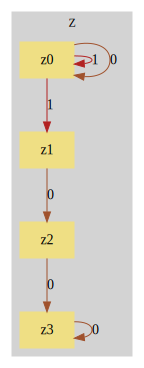

In [8]:
:dot expr_as_graph ("0",{x,y| x∈Z & y:δ(x,0)},
                    "1",{x,y| x∈S & y∈δ(x,1)})

Die Funktion $\widehat{\delta}$ berechnet die möglichen Zustände nach dem Abarbeiten eines Wortes. Zum Beispiel, kann sich der Automat nach dem Abarbeiten des Präfixes 111 in folgenden Zuständen befinden:

In [9]:
δs(S,[1,1,1])

$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$

Der Automat akzeptiert zum Beispiel das Wort 111 und das Wort 101 nicht, da:

In [10]:
δs(S,[1,1,1]) ∩ F

$\{\mathit{z2}\}$

Folgende Wörter der Länge 3 werden vom Automaten akzeptiert:

In [11]:
:table {x,y,z| [x,y,z]∈L}

|x|y|z|
|---|---|---|
|$0$|$1$|$0$|
|$0$|$1$|$1$|
|$1$|$1$|$0$|
|$1$|$1$|$1$|


and the following words of length 3 are not accepted:

In [12]:
:table {x,y,z| {x,y,z} ⊆ Σ & ¬([x,y,z]∈L)}

|x|y|z|
|---|---|---|
|$0$|$0$|$0$|
|$0$|$0$|$1$|
|$1$|$0$|$0$|
|$1$|$0$|$1$|


Es stellt sich die Frage, ob NFAs mächtiger sind als DFAs. Die 
Antwort lautet: Nein.

## Theorem (Rabin und Scott)
Jede von einem NFA akzeptierte Sprache kann auch von einem DFA akzeptiert
werden.

### Beweis
Sei $M = (\Sigma, Z, \delta , S, E)$ ein NFA. 
Konstruiere einen zu
  $M$ äquivalenten DFA 
  $M' = (\Sigma, \pow(Z), \delta' ,z_0', F)$ wie folgt:
* Zustandsmenge von $M'$: die Potenzmenge $\pow(Z)$ von $Z$,
* $\delta'(Z' , a) = \widehat{\delta}(Z',a)$ für alle $Z' \subseteq Z$ und $a \in \Sigma$,
* $z_0'=S$,
* $F = \{ Z' \subseteq Z \mid Z' \cap E \neq \emptyset\}$.
Offenbar sind M' und M äquivalent, denn für alle ...



Für den oben geladen Automaten können wir diese Konstruktion illustrieren.
Die Potenzmenge der Zustände ist:

In [13]:
ℙ(Z)

$\renewcommand{\emptyset}{\mathord\varnothing}\{\emptyset,\{\mathit{z0}\},\{\mathit{z0},\mathit{z1}\},\{\mathit{z0},\mathit{z2}\},\{\mathit{z0},\mathit{z3}\},\{\mathit{z1}\},\{\mathit{z0},\mathit{z1},\mathit{z2}\},\{\mathit{z0},\mathit{z1},\mathit{z3}\},\{\mathit{z1},\mathit{z2}\},\{\mathit{z1},\mathit{z3}\},\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\},\{\mathit{z2}\},\{\mathit{z0},\mathit{z2},\mathit{z3}\},\{\mathit{z1},\mathit{z2},\mathit{z3}\},\{\mathit{z2},\mathit{z3}\},\{\mathit{z3}\}\}$

Tabellarisch k¨ønnen wir $\widehat{\delta}$ für $\pow(Z)$ wie folgt ausrechnen:

In [14]:
:table {x,a,y| a∈Σ & x∈ℙ(Z) & y=δs(x,[a])}

|x|a|y|
|---|---|---|
|$\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\renewcommand{\emptyset}{\mathord\varnothing}\emptyset$|$0$|$\emptyset$|
|$\emptyset$|$1$|$\emptyset$|
|$\{\mathit{z0}\}$|$0$|$\{\mathit{z0}\}$|
|$\{\mathit{z0}\}$|$1$|$\{\mathit{z0},\mathit{z1}\}$|
|$\{\mathit{z0},\mathit{z1}\}$|$0$|$\{\mathit{z0},\mathit{z2}\}$|
|$\{\mathit{z0},\mathit{z1}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z2}\}$|
|$\{\mathit{z0},\mathit{z2}\}$|$0$|$\{\mathit{z0},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z2}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z3}\}$|$0$|$\{\mathit{z0},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z3}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|
|$\{\mathit{z1}\}$|$0$|$\{\mathit{z2}\}$|
|$\{\mathit{z1}\}$|$1$|$\{\mathit{z2}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z2}\}$|$0$|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z2}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|$0$|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z2}\}$|$0$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z2}\}$|$1$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z3}\}$|$0$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z3}\}$|$1$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|$0$|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z2}\}$|$0$|$\{\mathit{z3}\}$|
|$\{\mathit{z2}\}$|$1$|$\{\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|$0$|$\{\mathit{z0},\mathit{z3}\}$|
|$\{\mathit{z0},\mathit{z2},\mathit{z3}\}$|$1$|$\{\mathit{z0},\mathit{z1},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z2},\mathit{z3}\}$|$0$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z1},\mathit{z2},\mathit{z3}\}$|$1$|$\{\mathit{z2},\mathit{z3}\}$|
|$\{\mathit{z2},\mathit{z3}\}$|$0$|$\{\mathit{z3}\}$|
|$\{\mathit{z2},\mathit{z3}\}$|$1$|$\{\mathit{z3}\}$|
|$\{\mathit{z3}\}$|$0$|$\{\mathit{z3}\}$|
|$\{\mathit{z3}\}$|$1$|$\{\mathit{z3}\}$|


Graphisch lässt sich der Automat wie folgt darstellen; die Start und Endzustände sind noch nicht schön markiert.

In [15]:
:pref DOT_DECOMPOSE_NODES=FALSE

Preference changed: DOT_DECOMPOSE_NODES = FALSE


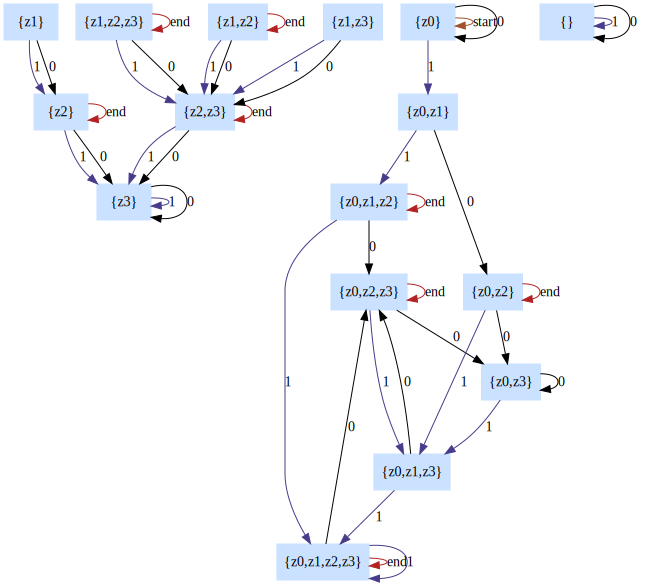

In [16]:
:dot expr_as_graph ("0",{x,y| x∈ℙ(Z) & δs(x,[0]) = y},
                    "1",{x,y| x∈ℙ(Z) & δs(x,[1]) = y},
                    "start", {x,y|x=y & x={z0}},
                    "end", {x,y|x=y & x∩F ≠ ∅})